At p = 0.1:
  L1 = P(k1=8 | n=14, p=0.1) = 1.5959173e-05
  L2 = P(k2=5 | n=14, p=0.1) = 0.0077561582
  Total likelihood = L1 * L2 = 1.2378187e-07
  Total log-likelihood = ln(L_total) = -15.9047

p 	 Total Likelihood (P(k1)*P(k2))
0.0	0
0.1	1.23782e-07
0.2	0.000173284
0.3	0.00455058
0.4	0.01897
0.5	0.0223965
0.6	0.00843113
0.7	0.00083582
0.8	1.08303e-05
0.9	1.52817e-09
1.0	0

Best decile (highest likelihood): p = 0.5

Analytic MLE (k_total / n_total) = 0.464286
Grid-based MLE (fine scan) = 0.464300


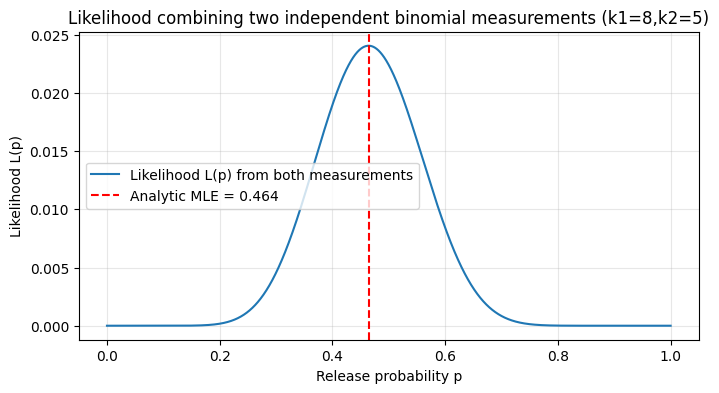

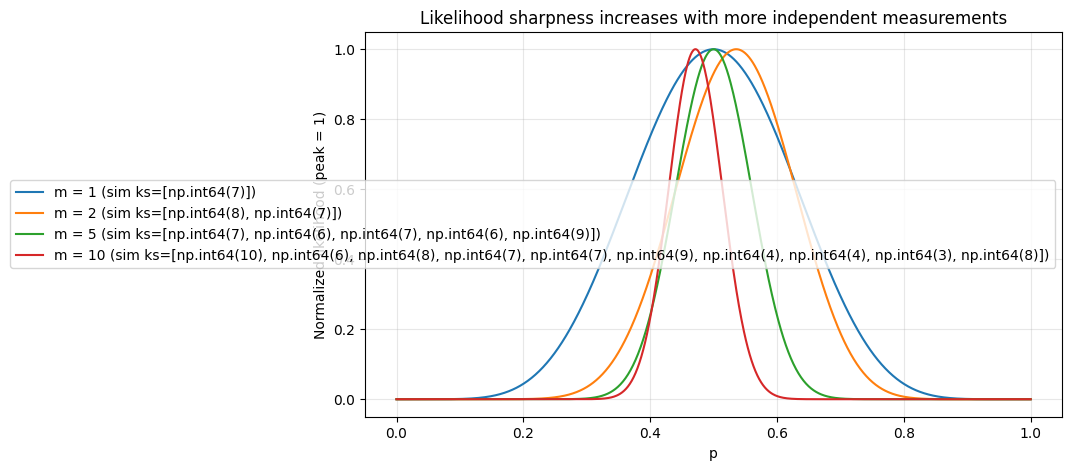

In [1]:
#EXERCISE 3
# Likelihood combining two independent binomial measurements
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# -----------------------
# Given experimental data
# -----------------------
n = 14           # number of quanta per measurement (same for both)
k1 = 8           # observed successes in measurement 1
k2 = 5           # observed successes in measurement 2

# -----------------------
# (A) Total likelihood at p = 0.1
# -----------------------
p_test = 0.1
L1 = binom.pmf(k1, n, p_test)  # probability of k1 given p_test
L2 = binom.pmf(k2, n, p_test)  # probability of k2 given p_test
L_total_p01 = L1 * L2          # product because measurements are independent
logL_total_p01 = np.log(L_total_p01) if L_total_p01 > 0 else -np.inf

print("At p = 0.1:")
print(f"  L1 = P(k1=8 | n=14, p=0.1) = {L1:.8g}")
print(f"  L2 = P(k2=5 | n=14, p=0.1) = {L2:.8g}")
print(f"  Total likelihood = L1 * L2 = {L_total_p01:.8g}")
print(f"  Total log-likelihood = ln(L_total) = {logL_total_p01:.4f}")
print()

# -----------------------
# (B) Likelihood for decile p values 0.0..1.0
# -----------------------
deciles = np.linspace(0.0, 1.0, 11)  # [0.0, 0.1, ..., 1.0]
lik_deciles = []

for p in deciles:
    # For p equal to 0 or 1 some pmf values may be exactly zero when k>0 or k<n
    L1_p = binom.pmf(k1, n, p)
    L2_p = binom.pmf(k2, n, p)
    Ltot = L1_p * L2_p
    lik_deciles.append(Ltot)

# Show the table
print("p \t Total Likelihood (P(k1)*P(k2))")
for p, L in zip(deciles, lik_deciles):
    print(f"{p:.1f}\t{L:.6g}")

# Which decile is best?
best_idx = int(np.argmax(lik_deciles))
print(f"\nBest decile (highest likelihood): p = {deciles[best_idx]:.1f}")

# -----------------------
# (C) Fine-grid MLE search and analytic MLE
# -----------------------
ps_fine = np.linspace(0.0, 1.0, 10001)   # 0.0001 steps
lik_fine = binom.pmf(k1, n, ps_fine) * binom.pmf(k2, n, ps_fine)
max_idx = np.argmax(lik_fine)
p_mle_grid = ps_fine[max_idx]

# Analytic MLE for combined data (total successes / total trials)
p_mle_analytic = (k1 + k2) / (n + n)

print(f"\nAnalytic MLE (k_total / n_total) = {p_mle_analytic:.6f}")
print(f"Grid-based MLE (fine scan) = {p_mle_grid:.6f}")

# Plot the likelihood curve (fine grid) and mark the MLE
plt.figure(figsize=(8,4))
plt.plot(ps_fine, lik_fine, lw=1.5, label='Likelihood L(p) from both measurements')
plt.axvline(p_mle_analytic, color='red', linestyle='--', label=f'Analytic MLE = {p_mle_analytic:.3f}')
plt.xlabel('Release probability p')
plt.ylabel('Likelihood L(p)')
plt.title('Likelihood combining two independent binomial measurements (k1=8,k2=5)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -----------------------
# (D) Demonstration: how likelihood sharpens with more independent measurements
# We will simulate extra independent measurements assuming a true underlying p_true,
# aggregate them, and plot likelihood curves for sample sizes m = 1, 2, 5, 10.
# -----------------------
np.random.seed(0)

p_true = p_mle_analytic  # use the current MLE as a plausible "true" value to demo
n_repeats_list = [1, 2, 5, 10]   # number of independent measurements we aggregate
ps = np.linspace(0.0, 1.0, 1001)

plt.figure(figsize=(9,5))
for m in n_repeats_list:
    # simulate m independent experiments: draw m binomial outcomes k_i ~ Binom(n, p_true)
    simulated_ks = binom.rvs(n, p_true, size=m)
    # compute total likelihood (product across i) for each candidate p in 'ps'
    # Equivalent to computing binom.pmf(k_i, n, p) for each and multiplying across i
    # Here we compute aggregated likelihood by multiplying pmfs
    liks = np.ones_like(ps)
    for k_obs in simulated_ks:
        liks *= binom.pmf(k_obs, n, ps)
    # normalize for plotting (optional) so curves fit on the same vertical scale
    liks_norm = liks / np.max(liks) if np.max(liks) > 0 else liks
    plt.plot(ps, liks_norm, label=f'm = {m} (sim ks={list(simulated_ks)})')

plt.xlabel('p')
plt.ylabel('Normalized likelihood (peak = 1)')
plt.title('Likelihood sharpness increases with more independent measurements')
plt.legend()
plt.grid(alpha=0.3)
plt.show()